#### SOLUTION

### Study session 10 - more bioinformatics: pandas, visualization and OOP 

#### BIOINF 575 - Fall 2022




___

#### <font color = "red">Exercise</font>

#### Implement the following class: 

The `Patient` class should have the following attributes as read-only properties (read-only = cannot be set through assignment outside of the class): `name`, `age`, `height`, `weight`, `BMI`, `status` (Inpatient/Outpatient), `diseases` (list of str), `disease_no`.    
It also should have 4 methods: `add_disease`, `update_weight`, `update_status`, `backup` (creates a patient with the same name, age, height, weight, diseases and status) 

BMI formula: 703 x weight (lbs) / [height (in)]2        
https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html




In [1]:
# Write your solution here


In [2]:
# implement the __init__ method 
# in __init__ we create custom attributes, to hide them we use __ :  name, age, ....
# implement __str__ and __repr__ methods to be able to display the object 

class Patient:
    """
    Stores the information for a patient
    Attributes:
        name(str): patient name (first last)
        age(int): patient age in years 
        height(float): patient height in inches 
        weight(float): patient weight in lbs 
        BMI: patient body mass index computed from height and weight with the formula 703 x weight (lbs) / [height (in)]2
        status(str): Patient status: one of Inpatient or Outpatient
        diseases (list of str): list of diseases the patient has 
        disease_no(int): number of diseases the patient has
    Methods:
        add_disease(str): adds an element to the disease list - updates number_of_diseases
        update_weight(float): changes the weight attribute to the given value 
        update_status(): changes the status (Inpatient -> Outpatient or Outpatient -> Inpatient) 
        backup(): creates a patient with the same name, age, height, weight, diseases and status
    """
    
    def __init__(self, name = None, age = None, height = None, weight = None, status = "Outpatient", diseases = None):
        self.__name = name
        self.__age = age 
        self.__height = height
        self.__weight = weight 
        self.__BMI = None
        if self.__height and self.__weight:
            self.__BMI = 703 * self.__weight / (self.__height)**2
        self.__status = status
        self.__diseases = diseases
        if not self.__diseases:
            self.__diseases = []
        self.__disease_no = len(self.__diseases)
    
    def __str__(self):
        return f'Patient({self.__name}, {self.__age}, {self.__height}, {self.__weight}, {self.__status}, {self.__diseases})'
    
    def __repr__(self):
        return f'Patient({self.__name}, {self.__age}, {self.__height}, {self.__weight}, {self.__status}, {self.__diseases})'
        

    @property
    def name(self):
        return self.__name
    
    @property
    def age(self):
        return self.__age
    
    @property
    def status(self):
        return self.__status

    @property
    def weight(self):
        return self.__weight 

    @property
    def height(self):
        return self.__height 
    
    @property
    def BMI(self):
        return self.__BMI
    
    @property
    def diseases(self):
        return self.__diseases 
    
    @property
    def disease_no(self):
        return self.__disease_no 
    
    
    def add_disease(self, disease_name):
        self.__diseases.append(disease_name) 
        self.__disease_no = len(self.__diseases)
    
    def update_weight(self, new_weight):
        self.__weight = new_weight
        if self.__height and self.__weight:
            self.__BMI = 703 * self.__weight / (self.__height)**2
    
    def update_status(self):
        if self.__status == "Inpatient":
            self.__status = "Outpatient"
        else:
            self.__status = "Inpatient"    
    
    def backup(self):
        return Patient(self.__name, self.__age, self.__height, self.__weight, self.__status, self.__diseases)
    

In [3]:
# test the class

p = Patient()
print(p.name)
print(p.weight)
print(p.disease_no)
print(p.diseases)
print(p.status)


None
None
0
[]
Outpatient


In [4]:
p = Patient("Test Patient", 40, 72, 170)
print(p.name)
print(p.weight)
print(p.BMI)
print(p.disease_no)
print(p.status)

Test Patient
170
23.053626543209877
0
Outpatient


In [5]:
703 * 170/(72)**2

23.053626543209877

In [6]:
p

Patient(Test Patient, 40, 72, 170, Outpatient, [])

In [7]:
p.update_status()
p

Patient(Test Patient, 40, 72, 170, Inpatient, [])

In [8]:
p.update_weight(180)
p.BMI

24.40972222222222

In [9]:
p.add_disease("Cold")
print(p.diseases)
print(p.disease_no)

['Cold']
1


In [10]:
# if we update only the disease list we have inconsistent data
p.diseases.append("Headache")
print(p.diseases)
print(p.disease_no)

['Cold', 'Headache']
1


___

#### <font color = "red">Exercise</font>

#### Implement the following classes: 

The `Gene` class should have an id (`gid`), `symbol` and `description`.   
The `GO_term` class should have a GO term id (`gtid`) and `name`.     
The `Gene_goTerm` class should have the `gene_id` and the `GO_term_id`. 
* <b>Create a list of genes, a list of GO terms, and a list of gene to GO term elements from the file `genes_info1.txt`   
* <b>Create pandas data frames from the above lists (look into the vars function, and \_\_dict\_\_ attribute for an object)


In [11]:
# Write your solution here




#### Implement the following classes: Gene, GOTerm, GENEGOTerm

In [12]:
# implement the Gene class
# implement the __init__ method 
# in __init__ we create custom attributes:  gid, symbol and description
# implement __str__ and __repr__ methods to be able to display the object 
# implement the __eq__ method to be able to chech equality between Gnee objects

class Gene:
    def __init__(self,  gid, sym, desc): 
        # checks can be done to make sure the data is not missing and 
        # each parameter should ahve the correct type
        self.gid = gid
        self.symbol = sym
        self.description = desc
        
    def __str__(self):
        return f"Gene({self.gid},'{self.symbol}','{self.description}')"
    
    def __repr__(self):
        return f"Gene({self.gid},'{self.symbol}','{self.description}')"
    
    def __eq__(self, g):
        return self.gid == g.gid and self.symbol == g.symbol and self.description == g.description
    
    

In [13]:
# test 

g = Gene(2, "GSYM", "Gene for testing")
g

Gene(2,'GSYM','Gene for testing')

In [14]:
# implement the GOTerm class
# implement the __init__ method 
# in __init__ we create custom attributes:  gid, symbol and description
# implement __str__ and __repr__ methods to be able to display the object 

class GOTerm:
    def __init__(self,  gtid, name): 
        # checks can be done to make sure the data is not missing and 
        # each parameter should ahve the correct type
        self.gtid = gtid
        self.name = name
        
    def __str__(self):
        return f"GOTerm({self.gtid},'{self.name}')"
    
    def __repr__(self):
        return f"GOTerm({self.gtid},'{self.name}')"
        
   

In [15]:
# test

gt = GOTerm(5, "Cell adhesion")
gt

GOTerm(5,'Cell adhesion')

In [16]:
# implement the GeneGOTerm class
# implement the __init__ method 
# in __init__ we create custom attributes:  gid, symbol and description
# implement __str__ and __repr__ methods to be able to display the object 

class GeneGOTerm:
    def __init__(self,  gid, gtid): 
        # checks can be done to make sure the data is not missing and 
        # each parameter should ahve the correct type
        self.gene_id = gid
        self.GO_term_id = gtid
        
    def __str__(self):
        return f"GeneGOTerm({self.gene_id},'{self.GO_term_id}')"
    
    def __repr__(self):
        return f"GeneGOTerm({self.gene_id},'{self.GO_term_id}')"
        
   

In [17]:
# test 
ggt = GeneGOTerm(2, 5)
ggt

GeneGOTerm(2,'5')

#### Create a list of genes, a list of GO terms, and a list of gene to GO term elements from the file `genes_info1.txt`

In [18]:
# initialize variables for the three lists
genes_lst = []
go_terms_lst = []
genes_go_terms_lst = []
# a list with the go terms description of 
# the go terms we already created 
# so we don't have duplicates
terms_lst = []

# read lines from the file one by one
file_name = "genes_info1.txt"
with open(file_name) as gene_file:
    header_line = gene_file.readline()
    for line in gene_file:
        line_list = line.strip().split("\t")
        # Create a Gene object and add it to the list
        # *line_list[:3] will take the first three values from the list 
        # and pass them as values for the first three parameters of the function
        # gid, sym and desc
        genes_lst.append(Gene(*line_list[:3]))
        
        # The last column in the file contains the GO terms separated by ";" 
        # that is the last element in the line_list for any given line
        for go_term in line_list[-1].strip().split(";"):
            if (go_term not in terms_lst):
                terms_lst.append(go_term)
                go_terms_lst.append(GOTerm(len(terms_lst), go_term))
            gene_id = line_list[0]
            go_term_id = terms_lst.index(go_term) + 1
            genes_go_terms_lst.append(GeneGOTerm(gene_id, go_term_id))


In [19]:
genes_lst

[Gene(672,'BRCA1','BRCA1 DNA repair associated'),
 Gene(675,'BRCA2','BRCA2 DNA repair associated'),
 Gene(7157,'TP53','tumor protein p53'),
 Gene(10296,'MAEA','macrophage erythroblast attacher, E3 ubiquitin ligase'),
 Gene(7040,'TGFB1','transforming growth factor beta 1'),
 Gene(64926,'RASAL3','RAS protein activator like 3')]

In [20]:
go_terms_lst

[GOTerm(1,'intrinsic apoptotic signaling pathway in response to DNA damage'),
 GOTerm(2,'transcription cis-regulatory region binding'),
 GOTerm(3,'transcription coactivator activity'),
 GOTerm(4,'ubiquitin-protein transferase activity'),
 GOTerm(5,'histone acetyltransferase activity'),
 GOTerm(6,'protease binding'),
 GOTerm(7,'single-stranded DNA binding'),
 GOTerm(8,'protein binding'),
 GOTerm(9,'negative regulation of transcription, DNA-templated'),
 GOTerm(10,'positive regulation of transcription by RNA polymerase II'),
 GOTerm(11,'promoter-specific chromatin binding'),
 GOTerm(12,'circadian behavior'),
 GOTerm(13,'cell adhesion')]

In [21]:
genes_go_terms_lst

[GeneGOTerm(672,'1'),
 GeneGOTerm(672,'2'),
 GeneGOTerm(672,'3'),
 GeneGOTerm(672,'4'),
 GeneGOTerm(675,'5'),
 GeneGOTerm(675,'6'),
 GeneGOTerm(675,'7'),
 GeneGOTerm(675,'8'),
 GeneGOTerm(7157,'9'),
 GeneGOTerm(7157,'10'),
 GeneGOTerm(7157,'11'),
 GeneGOTerm(7157,'12'),
 GeneGOTerm(10296,'13'),
 GeneGOTerm(10296,'8'),
 GeneGOTerm(10296,'11'),
 GeneGOTerm(7040,'13'),
 GeneGOTerm(7040,'8'),
 GeneGOTerm(64926,'13'),
 GeneGOTerm(64926,'8'),
 GeneGOTerm(64926,'6')]

#### Create pandas data frames from the above lists 
##### look into the `vars` function, and `__dict__` attribute for an object

In [22]:
# To create a dataframe from an object we can use the __dict__ attribute or the vars() function

print(g.__dict__)

{'gid': 2, 'symbol': 'GSYM', 'description': 'Gene for testing'}


In [23]:
help(vars)

Help on built-in function vars in module builtins:

vars(...)
    vars([object]) -> dictionary
    
    Without arguments, equivalent to locals().
    With an argument, equivalent to object.__dict__.



In [24]:
# we can create a dataframe from a dictionary if we have the columns as keys
# help(pd.DataFrame.from_dict)

# we can create a dataframe from a list of dictionaries 
# if we have each dictionary with the same key
# each dictionary in the list is a row
# help(pd.DataFrame.from_records)

import numpy as np
import pandas as pd

pd.DataFrame.from_records([vars(g)])

,gid,symbol,description
0,2,GSYM,Gene for testing


In [25]:
# let's create the list of dictionaries

[vars(gene) for gene in genes_lst]

[{'gid': '672',
  'symbol': 'BRCA1',
  'description': 'BRCA1 DNA repair associated'},
 {'gid': '675',
  'symbol': 'BRCA2',
  'description': 'BRCA2 DNA repair associated'},
 {'gid': '7157', 'symbol': 'TP53', 'description': 'tumor protein p53'},
 {'gid': '10296',
  'symbol': 'MAEA',
  'description': 'macrophage erythroblast attacher, E3 ubiquitin ligase'},
 {'gid': '7040',
  'symbol': 'TGFB1',
  'description': 'transforming growth factor beta 1'},
 {'gid': '64926',
  'symbol': 'RASAL3',
  'description': 'RAS protein activator like 3'}]

In [26]:
# let's create the dataframe

df_genes = pd.DataFrame.from_records([vars(gene) for gene in genes_lst])
df_genes

,gid,symbol,description
0,672,BRCA1,BRCA1 DNA repair associated
1,675,BRCA2,BRCA2 DNA repair associated
2,7157,TP53,tumor protein p53
3,10296,MAEA,"macrophage erythroblast attacher, E3 ubiquitin..."
4,7040,TGFB1,transforming growth factor beta 1
5,64926,RASAL3,RAS protein activator like 3


In [27]:
df_go_terms = pd.DataFrame.from_records([vars(go_term) for go_term in go_terms_lst])
df_go_terms

,gtid,name
0,1,intrinsic apoptotic signaling pathway in respo...
1,2,transcription cis-regulatory region binding
2,3,transcription coactivator activity
3,4,ubiquitin-protein transferase activity
4,5,histone acetyltransferase activity
5,6,protease binding
6,7,single-stranded DNA binding
7,8,protein binding
8,9,"negative regulation of transcription, DNA-temp..."
9,10,positive regulation of transcription by RNA po...


In [28]:
df_genes_go_terms = pd.DataFrame.from_records([vars(gene_go_term) for gene_go_term in genes_go_terms_lst])
df_genes_go_terms

,gene_id,GO_term_id
0,672,1
1,672,2
2,672,3
3,672,4
4,675,5
5,675,6
6,675,7
7,675,8
8,7157,9
9,7157,10


___

#### <font color = "red">Exercise</font>

#### Create a GO term gene dataframe

Create a dataframe with two columns: a GO_term column that has the GO term name, and a genes column that for each GO term has a set of genes (gene symbols) associated with the GO term separated by ",".



In [29]:
# Write your solution here




In [30]:
# help(df_genes.merge)

In [31]:
# put the dataframes together
# link genes and gene_go_term interactions by gene_id

merged_data_ggt = df_genes.merge(df_genes_go_terms, left_on = "gid", right_on = "gene_id", how = "inner")
merged_data_ggt.head()

,gid,symbol,description,gene_id,GO_term_id
0,672,BRCA1,BRCA1 DNA repair associated,672,1
1,672,BRCA1,BRCA1 DNA repair associated,672,2
2,672,BRCA1,BRCA1 DNA repair associated,672,3
3,672,BRCA1,BRCA1 DNA repair associated,672,4
4,675,BRCA2,BRCA2 DNA repair associated,675,5


In [32]:
# link the merged dataframe with the go_terms by go_term_id

merged_data = merged_data_ggt.merge(df_go_terms, left_on = "GO_term_id", right_on = "gtid", how = "inner")
merged_data.head()


,gid,symbol,description,gene_id,GO_term_id,gtid,name
0,672,BRCA1,BRCA1 DNA repair associated,672,1,1,intrinsic apoptotic signaling pathway in respo...
1,672,BRCA1,BRCA1 DNA repair associated,672,2,2,transcription cis-regulatory region binding
2,672,BRCA1,BRCA1 DNA repair associated,672,3,3,transcription coactivator activity
3,672,BRCA1,BRCA1 DNA repair associated,672,4,4,ubiquitin-protein transferase activity
4,675,BRCA2,BRCA2 DNA repair associated,675,5,5,histone acetyltransferase activity


In [33]:
# another option - merge using the method join, similar to the join between tables in SQL

# help(df_genes.join)


In [34]:
# link genes and gene_go_term interactions by gene_id
merged_data_ggt = df_genes_go_terms.join(df_genes.set_index("gid"), 
                                         on = ["gene_id"], how = "inner")
print("Join genes and gene_go_term interactions by gene_id:\n")
print(merged_data_ggt.head())

# link the merged dataframe with the go_terms by go_term_id
merged_data = merged_data_ggt.join(df_go_terms.set_index("gtid"), 
                                         on = ["GO_term_id"], how = "inner")
print("Join the resulting dataframe with the go_terms by go_term_id:\n")
merged_data.head()




Join genes and gene_go_term interactions by gene_id:

  gene_id  GO_term_id symbol                  description
0     672           1  BRCA1  BRCA1 DNA repair associated
1     672           2  BRCA1  BRCA1 DNA repair associated
2     672           3  BRCA1  BRCA1 DNA repair associated
3     672           4  BRCA1  BRCA1 DNA repair associated
4     675           5  BRCA2  BRCA2 DNA repair associated
Join the resulting dataframe with the go_terms by go_term_id:



,gene_id,GO_term_id,symbol,description,name
0,672,1,BRCA1,BRCA1 DNA repair associated,intrinsic apoptotic signaling pathway in respo...
1,672,2,BRCA1,BRCA1 DNA repair associated,transcription cis-regulatory region binding
2,672,3,BRCA1,BRCA1 DNA repair associated,transcription coactivator activity
3,672,4,BRCA1,BRCA1 DNA repair associated,ubiquitin-protein transferase activity
4,675,5,BRCA2,BRCA2 DNA repair associated,histone acetyltransferase activity


In [35]:
# select only the go_term name and gene symbol form the merged dataframe

df_sel = merged_data.loc[:,("name","symbol")]
df_sel.head()

,name,symbol
0,intrinsic apoptotic signaling pathway in respo...,BRCA1
1,transcription cis-regulatory region binding,BRCA1
2,transcription coactivator activity,BRCA1
3,ubiquitin-protein transferase activity,BRCA1
4,histone acetyltransferase activity,BRCA2


In [36]:
type(df_sel)

pandas.core.frame.DataFrame

In [37]:
df_sel.groupby("name").head()

,name,symbol
0,intrinsic apoptotic signaling pathway in respo...,BRCA1
1,transcription cis-regulatory region binding,BRCA1
2,transcription coactivator activity,BRCA1
3,ubiquitin-protein transferase activity,BRCA1
4,histone acetyltransferase activity,BRCA2
5,protease binding,BRCA2
19,protease binding,RASAL3
6,single-stranded DNA binding,BRCA2
7,protein binding,BRCA2
13,protein binding,MAEA


In [38]:
df_sel.groupby("name")["symbol"].head()

0      BRCA1
1      BRCA1
2      BRCA1
3      BRCA1
4      BRCA2
5      BRCA2
19    RASAL3
6      BRCA2
7      BRCA2
13      MAEA
16     TGFB1
18    RASAL3
8       TP53
9       TP53
10      TP53
14      MAEA
11      TP53
12      MAEA
15     TGFB1
17    RASAL3
Name: symbol, dtype: object

In [39]:
# Create a dataframe with two columns: a GO_term column that has the GO term name, 
#and a genes column that for each GO term has a set of genes (gene symbols) 
# associated with the GO term separated by ","

# on the grouped dataframe we apply the set function to the symbol column to apply 
# the set function to all the sene symbols that are in a group with the same GO term name

df_sel.groupby("name")["symbol"].apply(set)

name
cell adhesion                                                             {MAEA, TGFB1, RASAL3}
circadian behavior                                                                       {TP53}
histone acetyltransferase activity                                                      {BRCA2}
intrinsic apoptotic signaling pathway in response to DNA damage                         {BRCA1}
negative regulation of transcription, DNA-templated                                      {TP53}
positive regulation of transcription by RNA polymerase II                                {TP53}
promoter-specific chromatin binding                                                {TP53, MAEA}
protease binding                                                                {RASAL3, BRCA2}
protein binding                                                    {MAEA, TGFB1, RASAL3, BRCA2}
single-stranded DNA binding                                                             {BRCA2}
transcription cis-regulatory region

_____

#### <font color = "red">Exercise</font> 

#### Explore gene expression data

Read the data from the file `expression_data.txt` into a pandas data frame, the data file has comment lines that start with "#".
The group labels are as follows:
```python
    group = ["disease", "healthy", "disease", "disease", "healthy",
             "healthy", "healthy", "disease", "disease", "disease"]
```
  

Select the genes that have a p-value < 10% on a t-test between the expression in disease and the expression in healthy.  
The t-test is implemented in the scipy library in the stats module (you can use `from scipy import stats`).   
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html    
Keep in mind these are multiple statistical test we are doing so we should correct for multiple comparisons before intepreting/ reading too much into the results.    
https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html   


In [40]:
# Write your solution here


In [41]:
# import the numpy and pandas libraries to have access to the functionality that it provides
# also import the stats module from the scipy package, we could also use: import scipy.stats

import numpy as np
import pandas as pd
from scipy import stats #or  import scipy.stats

In [42]:
# read the data
# we will use the pandas read_csv function
# we can ignore comment lines setting up the comment attribute to "#" 
# the comment argument is set to the character that a comment line starts with 
# in this case "#", so comment = "#"
# we can set the sep argument to the character used to separate the line elements 
# elements in a line/row are separated by tab, \t, so we set up sep = "\t"

expr_data = pd.read_csv("expression_data.txt", comment = "#", sep = "\t")
expr_data

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10
Gene1,76.85,29.53,7.57,92.21,41.48,7.67,60.84,75.98,66.33,84.45
Gene2,39.45,85.04,77.22,93.47,39.17,98.00,40.12,63.34,70.06,68.69
Gene3,47.17,44.99,8.43,48.17,57.99,42.98,39.36,0.91,10.89,1.53
Gene4,0.60,29.85,93.68,99.83,59.33,66.58,97.36,61.73,38.13,84.76
Gene5,75.00,25.52,18.22,72.14,59.03,40.48,77.92,71.82,89.36,61.75
...,...,...,...,...,...,...,...,...,...,...
Gene96,58.32,88.38,10.11,96.15,32.61,73.66,30.21,90.02,95.41,13.99
Gene97,23.25,77.78,89.51,53.73,21.62,2.21,37.44,47.71,44.60,8.36
Gene98,12.13,85.86,69.77,75.48,35.44,87.63,2.03,42.35,96.95,94.42
Gene99,19.27,25.05,63.26,85.38,75.40,40.22,19.66,77.41,9.74,47.95


In [43]:
# explore the ttest_ind function

# help(stats.ttest_ind)


```
ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
        
 ... ... ...
    >>> from scipy import stats
    >>> rng = np.random.default_rng()
    
    Test with sample with identical means:
    
    >>> rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
    >>> rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
    >>> stats.ttest_ind(rvs1, rvs2)
    Ttest_indResult(statistic=-0.4390847099199348, pvalue=0.6606952038870015)
    >>> stats.ttest_ind(rvs1, rvs2, equal_var=False)
    Ttest_indResult(statistic=-0.4390847099199348, pvalue=0.6606952553131064)
    
```

In [44]:
# test the funtion with some made-up data
# a, b : array_like
# we use a list and tuple

stats.ttest_ind(a = [1,2,3], b = (3,5,6))

Ttest_indResult(statistic=-2.529822128134704, pvalue=0.06467689395635302)

In [45]:
# save ttest result into a variable
# the result looks like a tuple and is an instance of (derived from) tuple 
# so we can index

res = stats.ttest_ind(a = [1,2,3], b = (3,5,6))
res[0]

-2.529822128134704

In [46]:
isinstance(res,tuple)

True

In [47]:
# look at the type
type(res)

scipy.stats.stats.Ttest_indResult

In [48]:
# look what the object can do
# same as a tuple -- count and inxed

# dir(res)

```
[ ...
 'count',
 'index',
 'pvalue',
 'statistic']
```

In [49]:
# it also has 2 extra attributes: statistic (t-statistic) and pvalue

res.statistic

-2.529822128134704

In [50]:
res.pvalue

0.06467689395635302

In [51]:
# could we also apply this between two matrices (2x3 arrays)?
m1 = np.arange(1,7).reshape(2,3)
m2 = np.arange(5,11).reshape(2,3)
print("matrix 1")
print(m1)
print("matrix 2") 
print(m2)


matrix 1
[[1 2 3]
 [4 5 6]]
matrix 2
[[ 5  6  7]
 [ 8  9 10]]


In [52]:
# run/call the function with the 2 matrices
# we get 3 statistics and 3 p-values =>
# the test is applied between the respective columns
# this is expected since the first axis, 0, is used by default 

stats.ttest_ind(a = m1, b = m2)

Ttest_indResult(statistic=array([-1.88561808, -1.88561808, -1.88561808]), pvalue=array([0.2, 0.2, 0.2]))

In [53]:
# call the function to apply the test between the respective rows
# set the axis argument, use axis = 1

stats.ttest_ind(a = m1, b = m2, axis = 1)

Ttest_indResult(statistic=array([-4.89897949, -4.89897949]), pvalue=array([0.00804989, 0.00804989]))

In [54]:
# to double check 
# we do the test between the first row from each matrix
# we should get the first statistic and the first p-value
# from the  two present in the previous result

stats.ttest_ind(a = [1,2,3], b = [5,6,7])

Ttest_indResult(statistic=-4.898979485566356, pvalue=0.00804989310083772)

In [55]:
# now that we know that we can apply the test between matrices
# we should create a matrix for healthy and one for disease
# we use the group variable to separate the groups

# set up the group variable
group = ["disease", "healthy", "disease", "disease", "healthy",
         "healthy", "healthy", "disease", "disease", "disease"]

In [56]:
# we cannot do vectorized operations on lists
# the == will compare the list with the string

group == "healthy"

False

In [57]:
# We can make the list an array and use the == to create a 
# logical array that can be used to subset the columns of our data

group_array = np.array(group)
group_array == "healthy"

array([False,  True, False, False,  True,  True,  True, False, False,
       False])

In [58]:
# we use conitional subsetting of the columns for a dataframe 
# .loc[:,condititon]

healthy_expr = expr_data.loc[:, group_array == "healthy"]
disease_expr = expr_data.loc[:, group_array == "disease"]

print("expression in healthy")
print(healthy_expr)
print("expression in disease")
print(disease_expr)

expression in healthy
         Sample2  Sample5  Sample6  Sample7
Gene1      29.53    41.48     7.67    60.84
Gene2      85.04    39.17    98.00    40.12
Gene3      44.99    57.99    42.98    39.36
Gene4      29.85    59.33    66.58    97.36
Gene5      25.52    59.03    40.48    77.92
...          ...      ...      ...      ...
Gene96     88.38    32.61    73.66    30.21
Gene97     77.78    21.62     2.21    37.44
Gene98     85.86    35.44    87.63     2.03
Gene99     25.05    75.40    40.22    19.66
Gene100    76.11    87.45     7.54    69.17

[100 rows x 4 columns]
expression in disease
         Sample1  Sample3  Sample4  Sample8  Sample9  Sample10
Gene1      76.85     7.57    92.21    75.98    66.33     84.45
Gene2      39.45    77.22    93.47    63.34    70.06     68.69
Gene3      47.17     8.43    48.17     0.91    10.89      1.53
Gene4       0.60    93.68    99.83    61.73    38.13     84.76
Gene5      75.00    18.22    72.14    71.82    89.36     61.75
...          ...      ... 

In [59]:
# call the ttest_ind function for the 2 matrices to compute 
# the t-test between the respective rows
# the two rows to not need to have the same number of elements (4 vs 6)

stats.ttest_ind(healthy_expr,disease_expr,1)

Ttest_indResult(statistic=array([-1.80965493e+00, -2.07501694e-01,  2.28218525e+00,  7.08438304e-03,
       -9.09162018e-01,  6.71033778e-01, -4.15915283e-01, -3.54609668e-01,
        9.71890532e-02,  4.24880859e-01,  7.63571680e-01, -6.65329349e-01,
       -5.13004620e-01, -2.16298068e+00, -2.66593067e-01,  4.52822199e-01,
        6.64448319e-01, -9.25013168e-02, -5.05433002e-01,  4.33735296e-01,
        1.13809456e-01, -2.59114704e-02,  1.59213354e+00, -1.77758599e+00,
        1.45282203e+00,  3.89949100e-01,  9.71961632e-01, -5.92065312e-01,
       -1.91904083e+00,  7.14815222e-01,  1.48824407e+00, -1.10217102e+00,
        7.94001166e-01,  1.42410294e+00, -9.66744557e-01, -1.45044000e-01,
        2.83559690e+00,  2.98114568e-01, -3.20359206e-02, -1.89389565e+00,
        3.76696588e-01,  2.51563706e+00, -3.36438018e+00,  1.08330328e+00,
        8.05587009e-01,  1.18753005e+00,  1.19676421e+00,  1.11480007e+00,
       -6.53005252e-02,  6.14577467e-01,  1.65503937e-01,  5.15135640e-01,

In [60]:
# we only need the pvalues
ttest_pvalues = stats.ttest_ind(healthy_expr,disease_expr,1).pvalue
ttest_pvalues

array([0.10794759, 0.84080278, 0.05189402, 0.994521  , 0.38983254,
       0.52109846, 0.68840501, 0.73204816, 0.92496704, 0.68212044,
       0.46704155, 0.52455373, 0.62181016, 0.06249845, 0.7965253 ,
       0.66270496, 0.52508864, 0.92857424, 0.62688299, 0.67593957,
       0.91219319, 0.97996264, 0.1500197 , 0.11336718, 0.18434204,
       0.70675078, 0.35953628, 0.57015689, 0.09125042, 0.49505075,
       0.17500708, 0.30243795, 0.45010296, 0.19223106, 0.36198418,
       0.88826383, 0.02196024, 0.77321152, 0.97522825, 0.09485537,
       0.71619419, 0.03605295, 0.00986746, 0.31024064, 0.4437643 ,
       0.26907914, 0.26565758, 0.29730296, 0.94953705, 0.55590548,
       0.87265328, 0.62038627, 0.79476816, 0.77981433, 0.28036894,
       0.02419917, 0.35867353, 0.99846367, 0.18007715, 0.40415048,
       0.07573936, 0.27077048, 0.33519414, 0.06218927, 0.71984236,
       0.37002126, 0.82239467, 0.16371823, 0.68035153, 0.15296423,
       0.95062396, 0.17624777, 0.31507743, 0.73693796, 0.69510

In [61]:
# we create a pandas Series to have the p-values and the gene symbols together
# the gene symbols are available as the rowlabels (index) for the expr_data dataframe

gene_pvals = pd.Series(data = ttest_pvalues, index = expr_data.index)
gene_pvals

Gene1      0.107948
Gene2      0.840803
Gene3      0.051894
Gene4      0.994521
Gene5      0.389833
             ...   
Gene96     0.854723
Gene97     0.622145
Gene98     0.609314
Gene99     0.590556
Gene100    0.801649
Length: 100, dtype: float64

In [62]:
# Select the genes that have a p-value < 10% on a t-test between the expression in disease and the expression in healthy.
# Conditional subsetting of the series

gene_pvals[gene_pvals < 0.1]

Gene3     0.051894
Gene14    0.062498
Gene29    0.091250
Gene37    0.021960
Gene40    0.094855
Gene42    0.036053
Gene43    0.009867
Gene56    0.024199
Gene61    0.075739
Gene64    0.062189
Gene78    0.008845
dtype: float64

In [63]:
type(group_array)

numpy.ndarray

In [64]:
# get the array of unique elements from a given array
np.unique(group_array)

array(['disease', 'healthy'], dtype='<U7')

In [65]:
# alternative solution - using a function to get a p-value for a row in the expr_data dataframe

def run_ttest(gene_expr, group_vec):
    '''
    Computes the p-value of a t-test between the labels of two groups.
    Args:
    gene_expr (): the expression of a gene in the samples from the two groups
    '''
    gr_unique = np.unique(group_vec)
    # print(gr_unique[0])
    x = gene_expr[group_vec == gr_unique[0]]
    # print(x)
    y = gene_expr[group_vec == gr_unique[1]]
    #print(y)
    return stats.ttest_ind(x, y).pvalue

# test the function with some test data
run_ttest(np.array([2,3,4,5,7, 4,3,6,4,8]), group_array)  



0.6613276773863003

In [66]:
# Apply the function to each row of the dataframe
# call the funtion giving each row one by one as an argument (first argument) and collecting the results in a series
# other arguments can be passed to the applied function by using the name of the argument and providing a value
# e.g.: group_vec = group_array

pv = expr_data.apply(run_ttest, axis = 1, group_vec = group_array)
pv

Gene1      0.107948
Gene2      0.840803
Gene3      0.051894
Gene4      0.994521
Gene5      0.389833
             ...   
Gene96     0.854723
Gene97     0.622145
Gene98     0.609314
Gene99     0.590556
Gene100    0.801649
Length: 100, dtype: float64

In [67]:
# help(expr_data.apply)

```
Help on method apply in module pandas.core.frame:

apply(func: 'AggFuncType', axis: 'Axis' = 0, raw: 'bool' = False, result_type=None, args=(), **kwargs) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
    
        * 0 or 'index': apply function to each column.
        * 1 or 'columns': apply function to each row.
        
... ... ...

   Examples
    --------
    >>> df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
    >>> df
       A  B
    0  4  9
    1  4  9
    2  4  9
    
    Using a numpy universal function (in this case the same as
    ``np.sqrt(df)``):
    
    >>> df.apply(np.sqrt)
         A    B
    0  2.0  3.0
    1  2.0  3.0
    2  2.0  3.0
    
    Using a reducing function on either axis
    
    >>> df.apply(np.sum, axis=0)
    A    12
    B    27
    dtype: int64
    
    >>> df.apply(np.sum, axis=1)
    0    13
    1    13
    2    13
    dtype: int64

```

In [68]:
# Select the genes that have a p-value < 10% on a t-test between the expression in disease and the expression in healthy.
# Conditional subsetting of the series

pv[pv < 0.1]

Gene3     0.051894
Gene14    0.062498
Gene29    0.091250
Gene37    0.021960
Gene40    0.094855
Gene42    0.036053
Gene43    0.009867
Gene56    0.024199
Gene61    0.075739
Gene64    0.062189
Gene78    0.008845
dtype: float64

___

#### <font color = "red">Exercise</font>

#### Select the GO (gene ontology) terms for the genes that have a p-value < 10%.   
Gene ontology terms tell us what biological processes, molecular functions, and cellular components the genes are associated with.     
http://geneontology.org/docs/ontology-documentation/   

The file `gene_go.txt` contains that association.   
Note: look for the `.isin' method for a pd.Series.


In [69]:
# Write your solution here



In [70]:
# Select the genes that have a p-value < 10% on a t-test between the expression in disease and the expression in healthy.
pv[pv < 0.1]

Gene3     0.051894
Gene14    0.062498
Gene29    0.091250
Gene37    0.021960
Gene40    0.094855
Gene42    0.036053
Gene43    0.009867
Gene56    0.024199
Gene61    0.075739
Gene64    0.062189
Gene78    0.008845
dtype: float64

In [71]:
# Get only the gene symbols - the index

selected_genes = pv[pv < 0.1].index
selected_genes

Index(['Gene3', 'Gene14', 'Gene29', 'Gene37', 'Gene40', 'Gene42', 'Gene43',
       'Gene56', 'Gene61', 'Gene64', 'Gene78'],
      dtype='object')

In [72]:
# read the data from the file
# index_col=0 allows usto setup the first (index 0) column, in the file as the row lables (dataframe index)

gene_go = pd.read_csv("gene_go.txt", index_col=0)
gene_go

,Gene,GO
0,Gene3,GO66
1,Gene22,GO250
2,Gene74,GO233
3,Gene91,GO489
4,Gene99,GO88
...,...,...
95,Gene65,GO161
96,Gene25,GO102
97,Gene100,GO473
98,Gene68,GO188


In [73]:
# Get the Gene column from the dataframe  
gene_go.Gene

0       Gene3
1      Gene22
2      Gene74
3      Gene91
4      Gene99
       ...   
95     Gene65
96     Gene25
97    Gene100
98     Gene68
99     Gene88
Name: Gene, Length: 100, dtype: object

In [74]:
# for a pandas Series we can use the isin method to check if each 
# of the elements of the Series is in a specific iterable
# it results in a logical Series with True or False for each of the 
# elements in the series

gene_go.Gene.isin(selected_genes)

0      True
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Gene, Length: 100, dtype: bool

In [75]:
# We use conditional subsetting to get from our gene_go dataframe 
# only the rows that meet the condition
# only the rows where the logical Series has a value of True

gene_go[gene_go.Gene.isin(selected_genes)] 

,Gene,GO
0,Gene3,GO66
20,Gene43,GO218
21,Gene42,GO334
24,Gene64,GO40
36,Gene29,GO429
37,Gene78,GO56
47,Gene40,GO400
57,Gene56,GO162
58,Gene61,GO237
67,Gene37,GO345


In [76]:
# we can also look at only the GO column

gene_go.GO[gene_go.Gene.isin(selected_genes)] # or  
gene_go[gene_go.Gene.isin(selected_genes)].GO


0      GO66
20    GO218
21    GO334
24     GO40
36    GO429
37     GO56
47    GO400
57    GO162
58    GO237
67    GO345
69    GO264
Name: GO, dtype: object

___

#### <font color = "red">Exercise</font>

#### Visualize the data   
- Plot the data for the 2 genes with the lowest p-value in the same plot, scatterplot
- Plot the disease and healthy data points for the gene with the lowest p-value 
- plot a heatmap of the whole data use the groups as column labels to see if there is a difference between groups


In [77]:
group

['disease',
 'healthy',
 'disease',
 'disease',
 'healthy',
 'healthy',
 'healthy',
 'disease',
 'disease',
 'disease']

In [78]:
# group_array = np.array(group)
group_array

array(['disease', 'healthy', 'disease', 'disease', 'healthy', 'healthy',
       'healthy', 'disease', 'disease', 'disease'], dtype='<U7')

In [79]:
# get selected genes and p-values and sort them

sel_gene_pv = pv[pv < 0.1].sort_values()
sel_gene_pv

Gene78    0.008845
Gene43    0.009867
Gene37    0.021960
Gene56    0.024199
Gene42    0.036053
Gene3     0.051894
Gene64    0.062189
Gene14    0.062498
Gene61    0.075739
Gene29    0.091250
Gene40    0.094855
dtype: float64

In [80]:
# take the first 2 genes symbols 
# subset the index 

genes_to_plot = sel_gene_pv.index[:2]

In [81]:
# check the data
expr_data.head()

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10
Gene1,76.85,29.53,7.57,92.21,41.48,7.67,60.84,75.98,66.33,84.45
Gene2,39.45,85.04,77.22,93.47,39.17,98.00,40.12,63.34,70.06,68.69
Gene3,47.17,44.99,8.43,48.17,57.99,42.98,39.36,0.91,10.89,1.53
Gene4,0.60,29.85,93.68,99.83,59.33,66.58,97.36,61.73,38.13,84.76
Gene5,75.00,25.52,18.22,72.14,59.03,40.48,77.92,71.82,89.36,61.75


In [82]:
# subset the dataframe and only take the data for those 2 genes

genes_plt_data = expr_data.loc[genes_to_plot,]
genes_plt_data

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10
Gene78,62.96,1.32,37.95,77.92,14.44,1.28,53.21,64.26,48.82,83.96
Gene43,55.82,29.21,56.19,49.53,9.29,48.84,35.92,48.48,70.48,59.61


<AxesSubplot:>

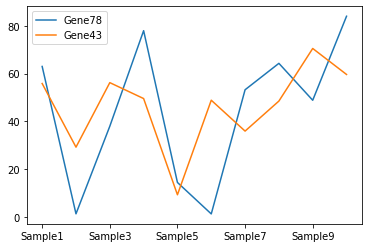

In [83]:
genes_plt_data.T.plot()

<AxesSubplot:>

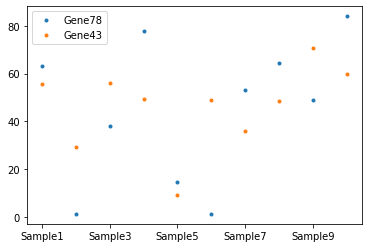

In [84]:
genes_plt_data.T.plot(style = ".")

In [85]:
# take only the gene with the min p-value - the first gene [0]
gene_min_pv = genes_to_plot[0]
gene_min_pv

'Gene78'

In [86]:
# take only the data row for the gene with the min p-value - the first gene .loc[row_name,]

gmpv_data = expr_data.loc[gene_min_pv,]
gmpv_data

Sample1     62.96
Sample2      1.32
Sample3     37.95
Sample4     77.92
Sample5     14.44
Sample6      1.28
Sample7     53.21
Sample8     64.26
Sample9     48.82
Sample10    83.96
Name: Gene78, dtype: float64

In [87]:
# to plot using seaborn, we need a dataframe
# we want to create a dataframe with 2 columns the values for the gene and the group
# we can use concat or join to put together the 2 columns

group_series = pd.Series(group, index = gmpv_data.index, name = "group")
group_gene_df = pd.concat([gmpv_data, group_series], axis = 1)
group_gene_df

,Gene78,group
Sample1,62.96,disease
Sample2,1.32,healthy
Sample3,37.95,disease
Sample4,77.92,disease
Sample5,14.44,healthy
Sample6,1.28,healthy
Sample7,53.21,healthy
Sample8,64.26,disease
Sample9,48.82,disease
Sample10,83.96,disease


<AxesSubplot:xlabel='group', ylabel='Gene78'>

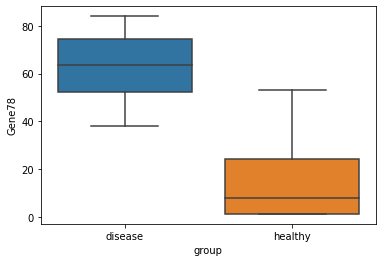

In [88]:
# we import the seaborn functionality and use the boxplot

import seaborn as sns
sns.boxplot(data = group_gene_df, x = "group", y = gene_min_pv)

<AxesSubplot:>

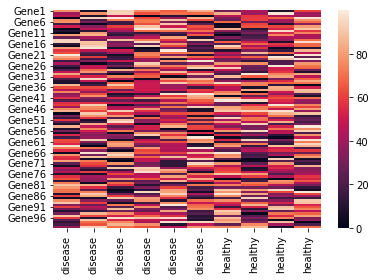

In [89]:
# prepare the data for heatmap, make a copy since we want to change lables and sort the data

expr_data_sorted = expr_data
# set the group as column labels 
# since we are interested in the group not the individual samples 

expr_data_sorted.columns = group

# sort the columns by group getting the order using the np.argsort
expr_data_sorted = expr_data_sorted.iloc[:,np.argsort(group)]

sns.heatmap(expr_data_sorted)

In [90]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [91]:
# the heatmap method documentation recommands clustermap if we want to cluster the data 

sns.clustermap?

Signature:
sns.clustermap(
    data,
    *,
    pivot_kws=None,
    method='average',
    metric='euclidean',
    z_score=None,
    standard_scale=None,
    figsize=(10, 10),
    cbar_kws=None,
    row_cluster=True,
    col_cluster=True,
    row_linkage=None,
    col_linkage=None,
    row_colors=None,
    col_colors=None,
    mask=None,
    dendrogram_ratio=0.2,
    colors_ratio=0.03,
    cbar_pos=(0.02, 0.8, 0.05, 0.18),
    tree_kws=None,
    **kwargs,
)
Docstring:
Plot a matrix dataset as a hierarchically-clustered heatmap.

Parameters
----------
data : 2D array-like
    Rectangular data for clustering. Cannot contain NAs.
pivot_kws : dict, optional
    If `data` is a tidy dataframe, can provide keyword arguments for
    pivot to create a rectangular dataframe.
method : str, optional
    Linkage method to use for calculating clusters. See
    :func:`scipy.cluster.hierarchy.linkage` documentation for more
    information.
metric : str, optional
    Distance metric to use for the data

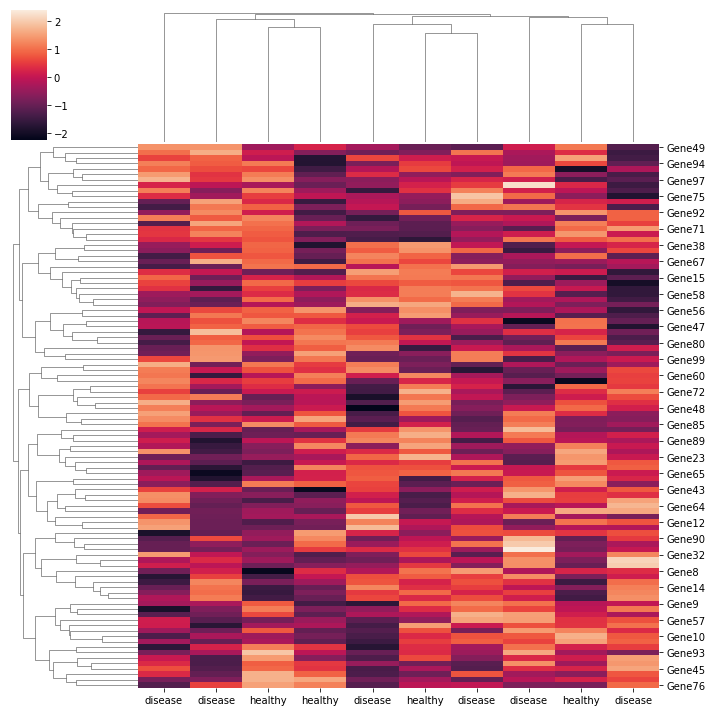

In [92]:
sns.clustermap(expr_data, z_score = 0, row_cluster = True)